<h1><center>CSCI - 6409 - Process of Data Science - Summer 2022</h1></center>

<h1><center>Assignment 2</h1></center>

Benny Daniel Tharigopala -
B00899629

Karthik Kannan Nanthakumar - B00891387


# **Import Files to Google Colab**




In [1]:
from google.colab import files
# uploaded = files.upload()

# Imports

In [2]:
import pandas as pd
import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
source_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.csv')

# Shape of the dataframe

In [5]:
print(source_dataset.shape)

(7043, 20)


In [6]:
source_dataset.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,0.162147,64.761692,2283.300441
std,0.368612,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,0.000000,35.500000,401.450000
50%,0.000000,70.350000,1397.475000
75%,0.000000,89.850000,3794.737500
max,1.000000,118.750000,8684.800000


# **1.A. Data quality report:**
The data quality report consists of:
1. Tabular report for continuous features
2. Tabular report for categorical features
3. Data visualizations of values in each feature 

Reference - [Brightspace Tutorial](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [7]:
import warnings

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)
#Referred from Tutorial 2 of CSCI 6409 - [https://dal.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fe8e7287-82c2-42bc-85ac-ae940127b726]


# What are the features in the Telco-Customer-Churn Dataset ?

In [8]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


## We can observe that all 20 columns of the dataset do not have any Null-records within them, since the total number of rows is **7043** and the number of non-null records in each column is also **7043**.

# Now let's peek at the first few rows of our data frame

In [9]:
source_dataset.loc[0]

customerID                0002-ORFBO
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                       Yes
PhoneService                     Yes
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract                    One year
PaperlessBilling                 Yes
PaymentMethod       Electronic Check
MonthlyCharges                 65.60
TotalCharges                  593.30
Churn                             No
Date                    01 Jan, 2010
Name: 0, dtype: object

In [10]:
source_dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic Check,65.60,593.30,No,"01 Jan, 2010"
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,59.90,542.40,No,"01 Jan, 2010"
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.90,280.85,Yes,"01 Jan, 2010"
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),98.00,1237.85,Yes,"02 Jan, 2010"
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,83.90,267.40,Yes,"03 Jan, 2010"
5,0013-MHZWF,Female,0,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed Check,69.40,571.45,No,"03 Jan, 2010"
6,0013-SMEOE,Female,1,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),109.70,7904.25,No,"04 Jan, 2010"
7,0014-BMAQU,Male,0,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,84.65,5377.80,No,"04 Jan, 2010"
8,0015-UOCOJ,Female,1,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.20,340.35,No,"06 Jan, 2010"
9,0016-QLJIS,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,90.45,5957.90,No,"06 Jan, 2010"


# Fit the best possible datatypes for columns of type object.

In [11]:
source_dataset = source_dataset.convert_dtypes()
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   PhoneService      7043 non-null   string 
 6   InternetService   7043 non-null   string 
 7   OnlineSecurity    7043 non-null   string 
 8   OnlineBackup      7043 non-null   string 
 9   DeviceProtection  7043 non-null   string 
 10  TechSupport       7043 non-null   string 
 11  StreamingTV       7043 non-null   string 
 12  StreamingMovies   7043 non-null   string 
 13  Contract          7043 non-null   string 
 14  PaperlessBilling  7043 non-null   string 
 15  PaymentMethod     7043 non-null   string 
 16  MonthlyCharges    7043 non-null   Float64


In [12]:
source_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Date'],
      dtype='object')

# Split the Datatypes into Numerical and Categorical attributes

**Let's Segregate the columns with numerical values**

In [13]:
source_dataset.describe(include=['number'])

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,0.16,64.76,2283.30
std,0.37,30.09,2266.77
min,0.00,18.25,18.80
25%,0.00,35.50,401.45
50%,0.00,70.35,1397.47
75%,0.00,89.85,3794.74
max,1.00,118.75,8684.80


**Let's Segregate the columns with categorical values**

In [14]:
source_dataset.describe(exclude=['number'])

,customerID,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Date
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,2,4,2,3346
top,0002-ORFBO,Male,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),No,"04 Feb, 2011"
freq,1,3555,3641,4933,5016,2917,3584,3543,3518,3547,3216,3241,3875,5019,1892,5174,7


# Features in the Dataset:

**Continuous Features:**

SeniorCitizen, 
MonthlyCharges, 
TotalCharges


**Categorical Features:**

customerID,
gender,Partner, Dependents,                                                        PhoneService,	InternetService,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod,	Churn,	Date



# 1.B.Data Quality Report for Continuous Features:
Code refererred from [CSCI 6409 - Tutorial 2](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [15]:
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df
build_continuous_features_report(source_dataset)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SeniorCitizen,7043,0.00,2,0.00,0.00,0.16,0.00,0.00,1.00,0.37
MonthlyCharges,7043,0.00,1585,18.25,35.50,64.76,70.35,89.85,118.75,30.09
TotalCharges,7043,0.16,6530,18.80,401.45,2283.30,1397.47,3794.74,8684.80,2266.77


# Data Quality Report for Categorical Features:
Code refererred from [CSCI 6409 - Tutorial 2](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [16]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [17]:
build_categorical_features_report(source_dataset) 

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
customerID,7043,0.00,7043,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,100.00,[],0,0.00
gender,7043,0.00,2,[Male],3555,50.48,[Female],3488,49.52
Partner,7043,0.00,2,[No],3641,51.70,[Yes],3402,48.30
Dependents,7043,0.00,2,[No],4933,70.04,[Yes],2110,29.96
PhoneService,7043,0.00,2,[Yes],5016,71.22,[No],2027,28.78
InternetService,7043,0.00,3,[Fiber optic],2917,41.42,[DSL],2708,38.45
OnlineSecurity,7043,0.00,3,[No],3584,50.89,[Yes],2041,28.98
OnlineBackup,7043,0.00,3,[No],3543,50.31,[Yes],2082,29.56
DeviceProtection,7043,0.00,3,[No],3518,49.95,[Yes],2107,29.92
TechSupport,7043,0.00,3,[No],3547,50.36,[Yes],2078,29.50


# Visualization of Continuous Features

In [18]:
source_dataset.describe(include=['number'])

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,0.16,64.76,2283.30
std,0.37,30.09,2266.77
min,0.00,18.25,18.80
25%,0.00,35.50,401.45
50%,0.00,70.35,1397.47
75%,0.00,89.85,3794.74
max,1.00,118.75,8684.80


## Configuring Plot properties

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["font.size"] = 15

## Histogram for the column - SeniorCitizen

Text(0.5, 1.0, 'SeniorCitizen Histogram')

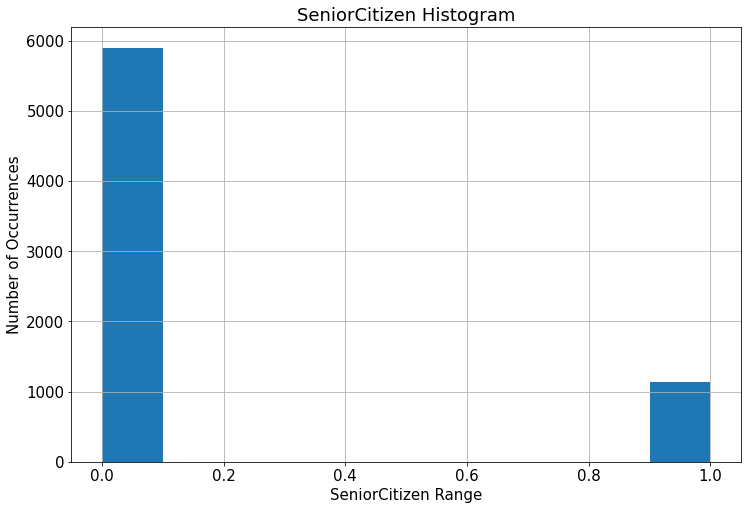

In [20]:
source_dataset.hist(column=['SeniorCitizen'])
plt.xlabel('SeniorCitizen Range')
plt.ylabel('Number of Occurrences')
plt.title('SeniorCitizen Histogram')

## Histogram for the column - MonthlyCharges

Text(0.5, 1.0, 'MonthlyCharges Histogram')

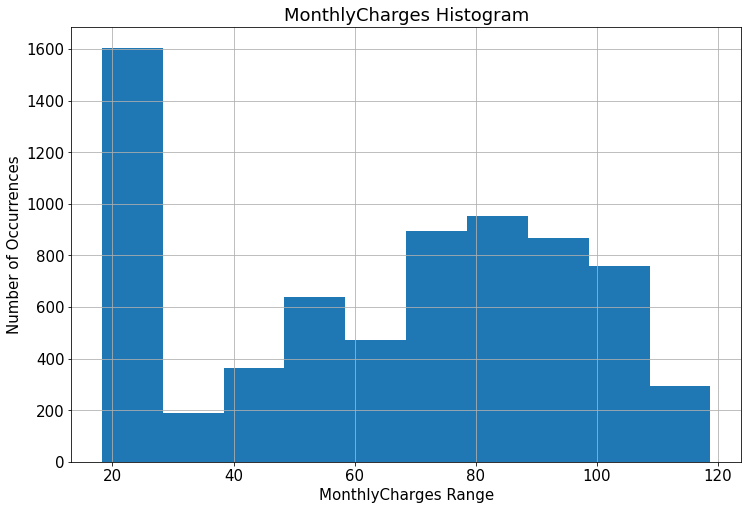

In [21]:
source_dataset.hist(column=['MonthlyCharges'])
plt.xlabel('MonthlyCharges Range')
plt.ylabel('Number of Occurrences')
plt.title('MonthlyCharges Histogram')

## Histogram for the column - TotalCharges

Text(0.5, 1.0, 'TotalCharges Histogram')

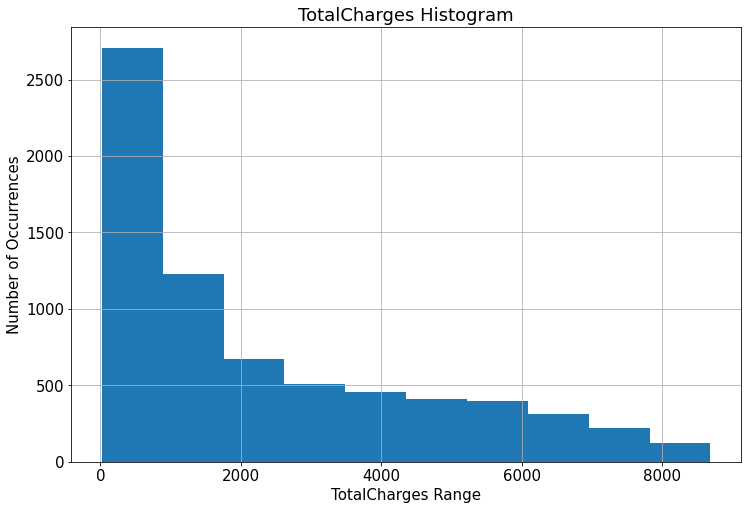

In [22]:
source_dataset.hist(column=['TotalCharges'])
plt.xlabel('TotalCharges Range')
plt.ylabel('Number of Occurrences')
plt.title('TotalCharges Histogram')

In [23]:
# continuous_features = source_dataset.describe(include=['number']).columns
# for col in continuous_features:
#   source_dataset.hist(column=['{}'.format(col)])
#   plt.xlabel('{} Range'.format(col))
#   plt.ylabel('Number of Occurrences')
#   plt.title('{} Histogram'.format(col))

# Visualization of Categorical Features

In [24]:
source_dataset.describe(exclude=['number'])

,customerID,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Date
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,2,4,2,3346
top,0002-ORFBO,Male,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),No,"04 Feb, 2011"
freq,1,3555,3641,4933,5016,2917,3584,3543,3518,3547,3216,3241,3875,5019,1892,5174,7


## CustomerId

*We are not going to find out the distribution of Customer Id, since we already know that each row corresponds to an unique customer and that the cardinality of the column is 7043.*

## Frequencies of Male & Female for the Column - "Gender"

Text(0.5, 1.0, 'Bar Plot for Gender')

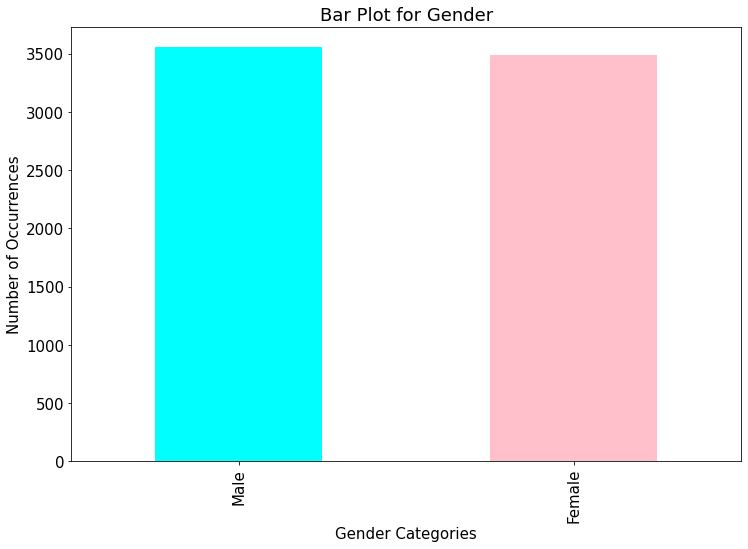

In [25]:
p1 = source_dataset['gender'].value_counts().plot.bar(color=['cyan', 'pink']);
plt.xlabel('Gender Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Gender')

## Frequency Distribution for the Column - "Partner"

Text(0.5, 1.0, 'Bar Plot for Partner')

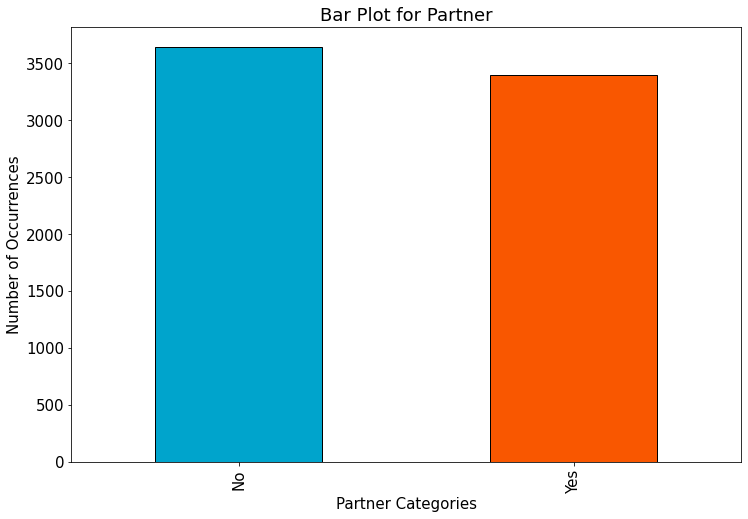

In [26]:
p1 = source_dataset['Partner'].value_counts().plot.bar(color=['#00A4CCFF', '#F95700FF'],edgecolor='black');
plt.xlabel('Partner Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Partner')

## Frequency Distribution for the Column - "Dependents"

Text(0.5, 1.0, 'Bar Plot for Dependents')

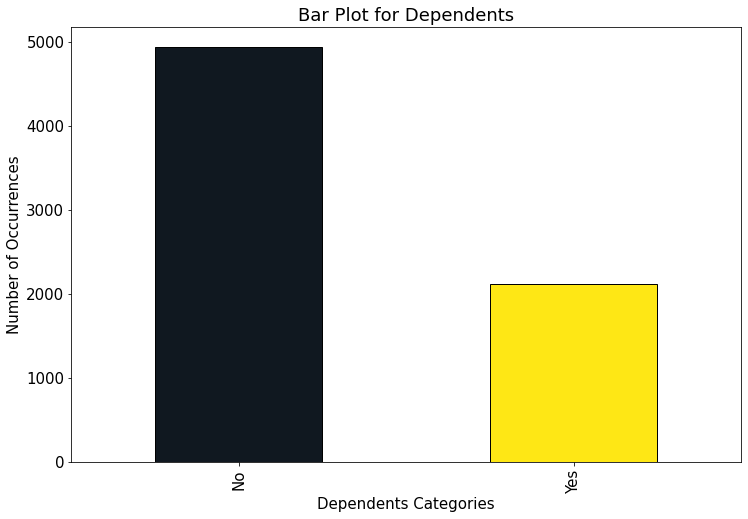

In [27]:
p1 = source_dataset['Dependents'].value_counts().plot.bar(color=['#101820FF', '#FEE715FF', 'brown'],edgecolor='black');
plt.xlabel('Dependents Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Dependents')

## Frequency Distribution for the Column - "PhoneService"

Text(0.5, 1.0, 'Bar Plot for PhoneService')

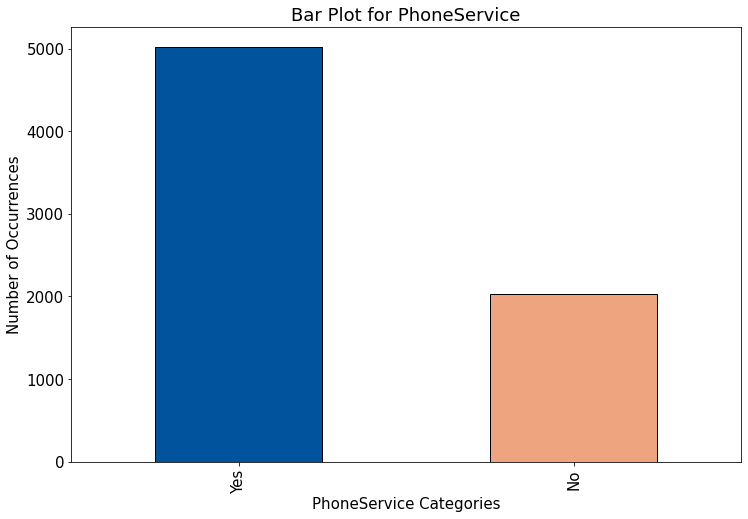

In [28]:
p1 = source_dataset['PhoneService'].value_counts().plot.bar(color=['#00539CFF', '#EEA47FFF', 'brown'],edgecolor='black');
plt.xlabel('PhoneService Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for PhoneService')

## Frequency Distribution for the Column - "InternetService"

Text(0.5, 1.0, 'Bar Plot for InternetService')

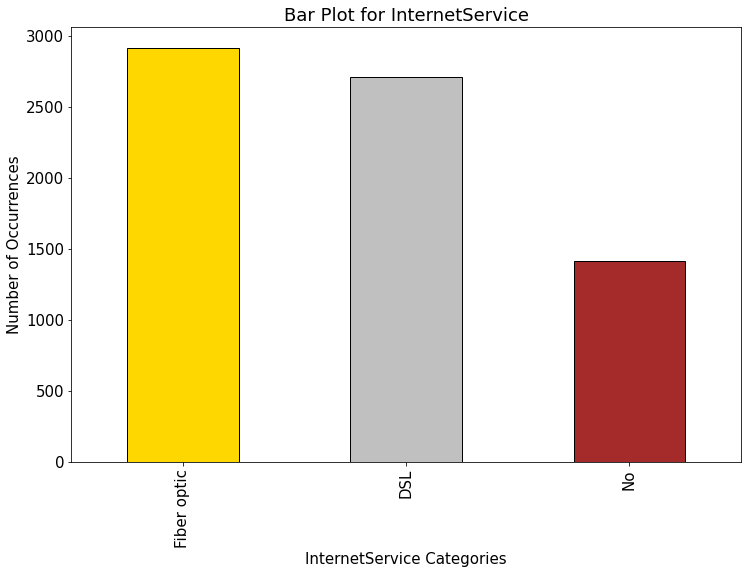

In [29]:
p1 = source_dataset['InternetService'].value_counts().plot.bar(color=['gold', 'silver', 'brown'],edgecolor='black');
plt.xlabel('InternetService Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for InternetService')

## Frequency Distribution for the Column - "OnlineSecurity"

Text(0.5, 1.0, 'Bar Plot for OnlineSecurity')

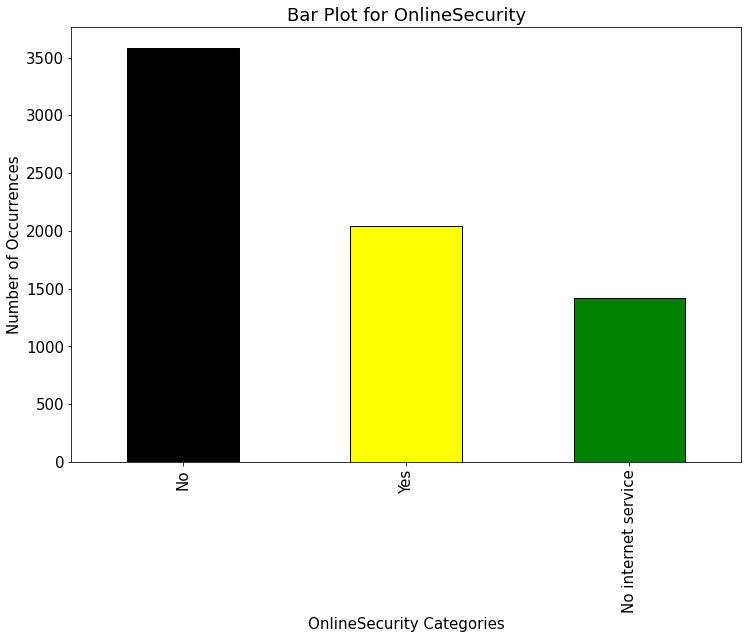

In [30]:
p1 = source_dataset['OnlineSecurity'].value_counts().plot.bar(color=['black', 'yellow', 'green', 'purple', 'cyan'],edgecolor='black');
plt.xlabel('OnlineSecurity Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for OnlineSecurity')

## Frequency Distribution for the Column - "OnlineBackup"

Text(0.5, 1.0, 'Bar Plot for OnlineBackup')

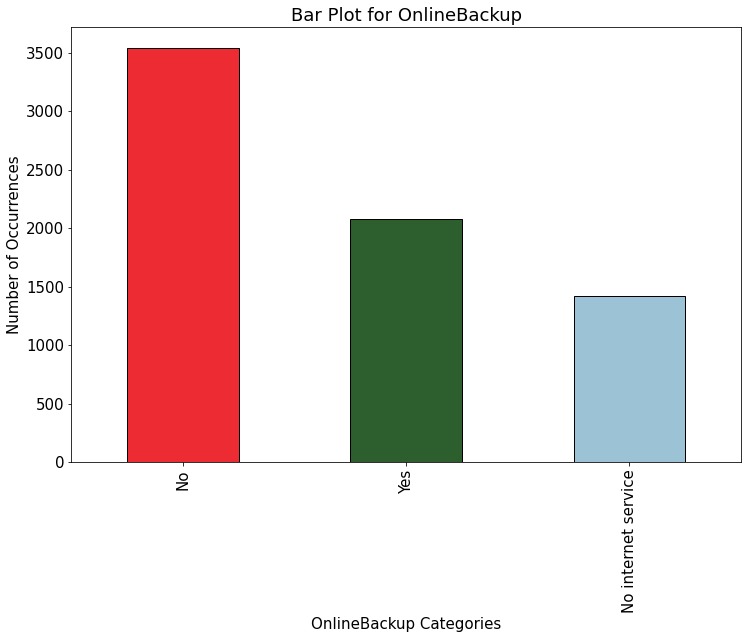

In [31]:
p1 = source_dataset['OnlineBackup'].value_counts().plot.bar(color=['#ED2B33FF', '#2C5F2D','#9CC3D5FF'],edgecolor='black');
plt.xlabel('OnlineBackup Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for OnlineBackup')

## Frequency Distribution for the Column - "DeviceProtection"

Text(0.5, 1.0, 'Bar Plot for DeviceProtection')

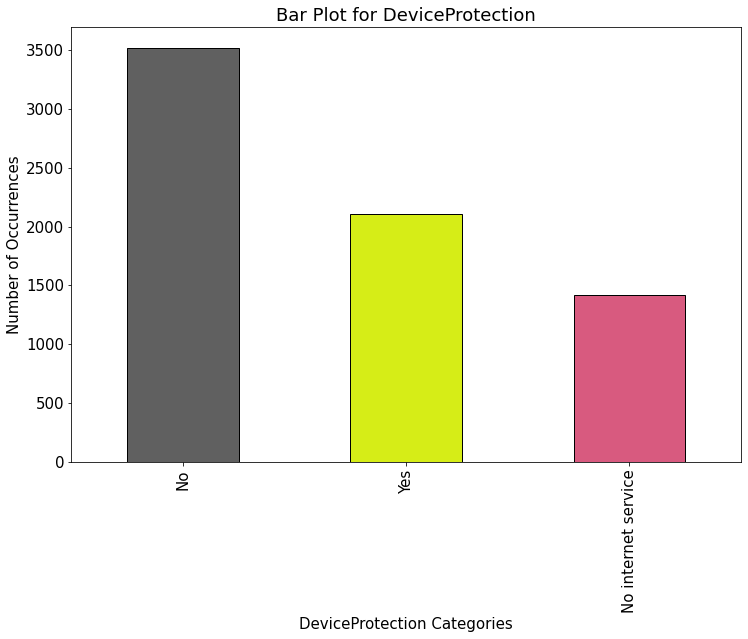

In [32]:
p1 = source_dataset['DeviceProtection'].value_counts().plot.bar(color=['#606060FF', '#D6ED17FF','#D85A7FFF'],edgecolor='black');
plt.xlabel('DeviceProtection Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for DeviceProtection')

## Frequency Distribution for the Column - "TechSupport"

Text(0.5, 1.0, 'Bar Plot for TechSupport')

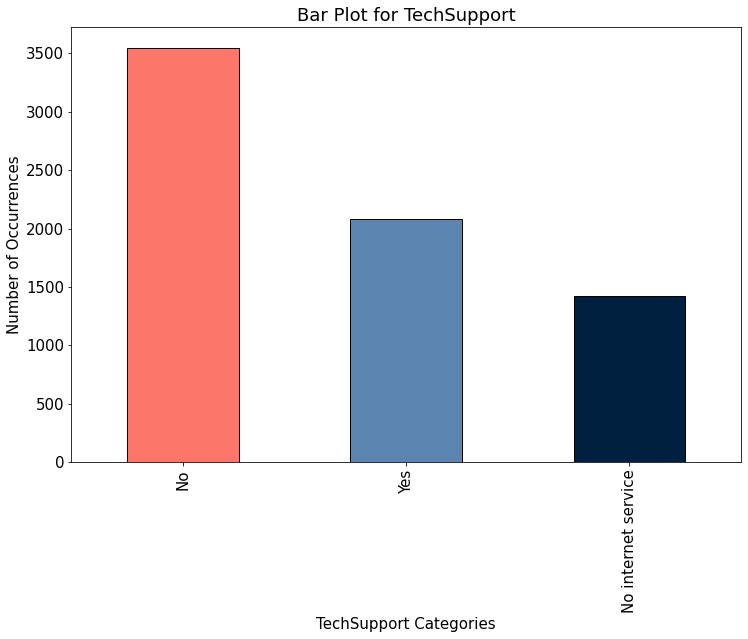

In [33]:
p1 = source_dataset['TechSupport'].value_counts().plot.bar(color=['#FC766A', '#5B84B1','#00203FFF'],edgecolor='black');
plt.xlabel('TechSupport Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for TechSupport')

## Frequency Distribution for the Column - "StreamingTV"

Text(0.5, 1.0, 'Bar Plot for StreamingTV')

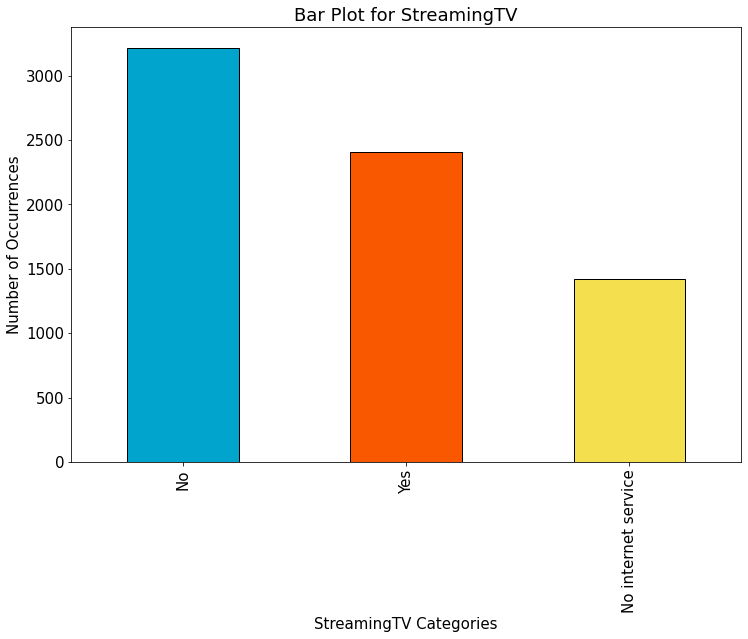

In [34]:
p1 = source_dataset['StreamingTV'].value_counts().plot.bar(color=['#00A4CCFF', '#F95700FF','#F4DF4EFF'],edgecolor='black');
plt.xlabel('StreamingTV Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for StreamingTV')

## Frequency Distribution for the Column - "StreamingMovies"

Text(0.5, 1.0, 'Bar Plot for StreamingMovies')

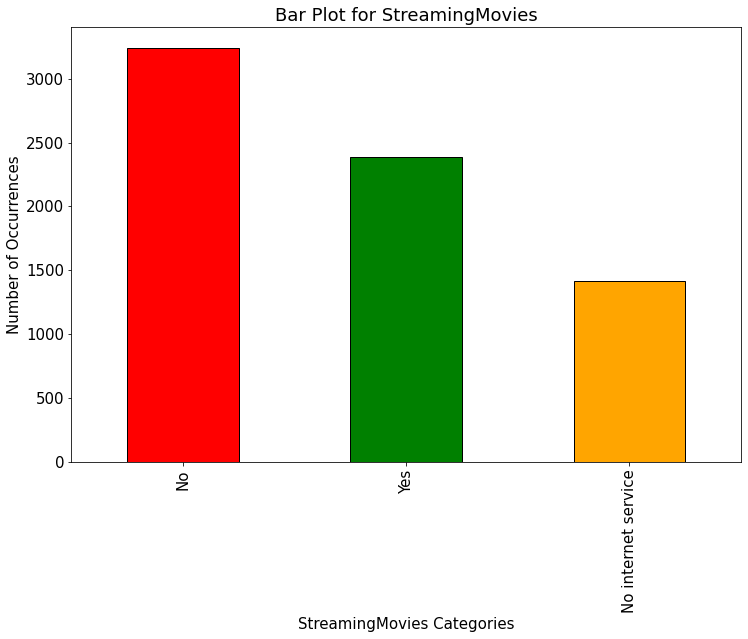

In [35]:
p1 = source_dataset['StreamingMovies'].value_counts().plot.bar(color=['red', 'green', 'orange'],edgecolor='black');
plt.xlabel('StreamingMovies Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for StreamingMovies')

## Frequency Distribution for the Column - "Contract"

Text(0.5, 1.0, 'Bar Plot for Contract')

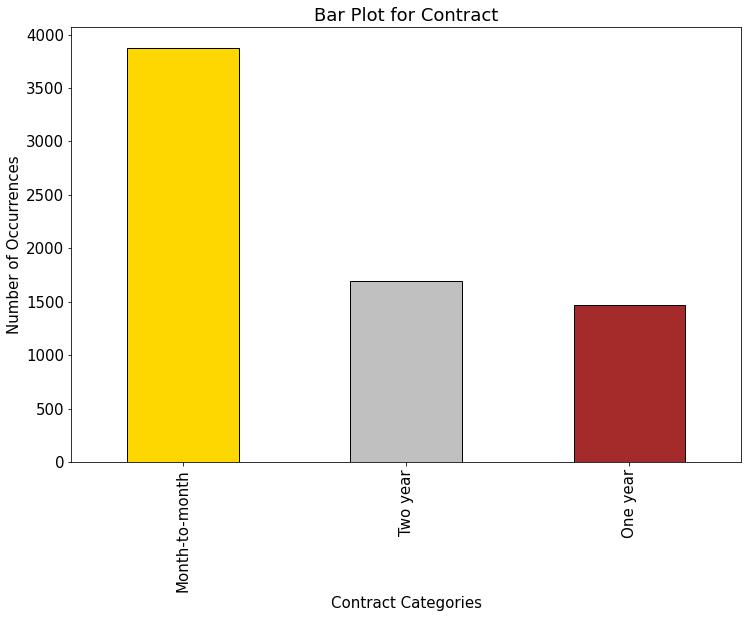

In [36]:
p1 = source_dataset['Contract'].value_counts().plot.bar(color=['gold', 'silver', 'brown'],edgecolor='black');
plt.xlabel('Contract Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Contract')

## Frequency Distribution for the Column - "PaperlessBilling"

Text(0.5, 1.0, 'Bar Plot for PaperlessBilling')

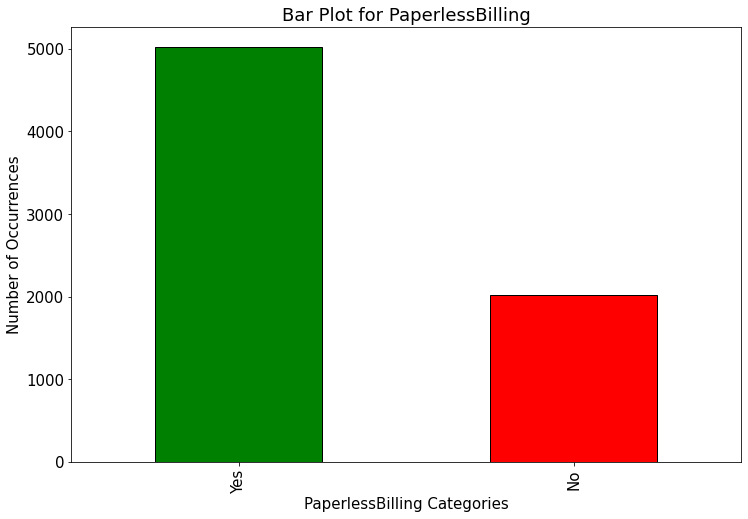

In [37]:
p1 = source_dataset['PaperlessBilling'].value_counts().plot.bar(color=['green', 'red', 'green', 'purple', 'cyan'],edgecolor='black');
plt.xlabel('PaperlessBilling Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for PaperlessBilling')

## Frequency Distribution for the Column - "PaymentMethod"

Text(0.5, 1.0, 'Bar Plot for PaymentMethod')

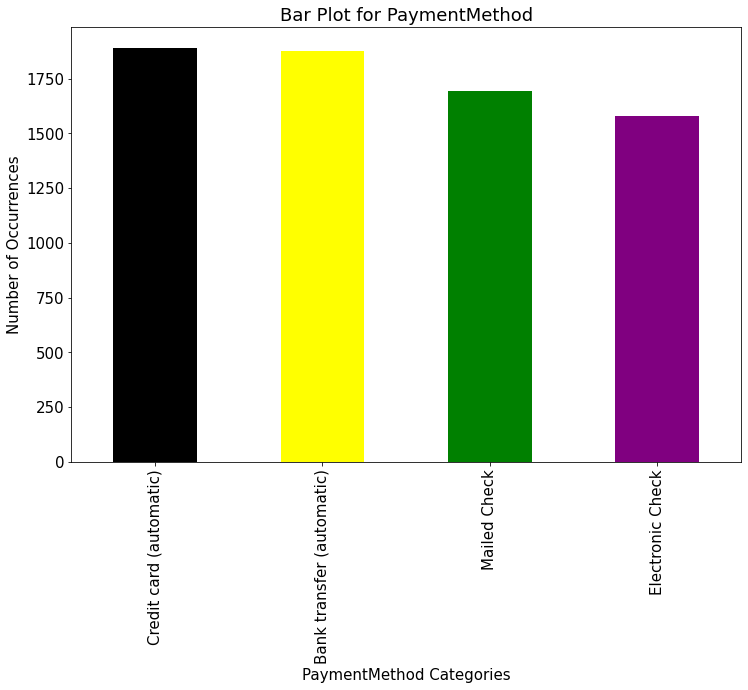

In [38]:
p1 = source_dataset['PaymentMethod'].value_counts().plot.bar(color=['black', 'yellow', 'green', 'purple', 'cyan']);
plt.xlabel('PaymentMethod Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for PaymentMethod')

## Frequency Distribution of values for the Column - "Churn"

Text(0.5, 1.0, 'Bar Plot for Churn')

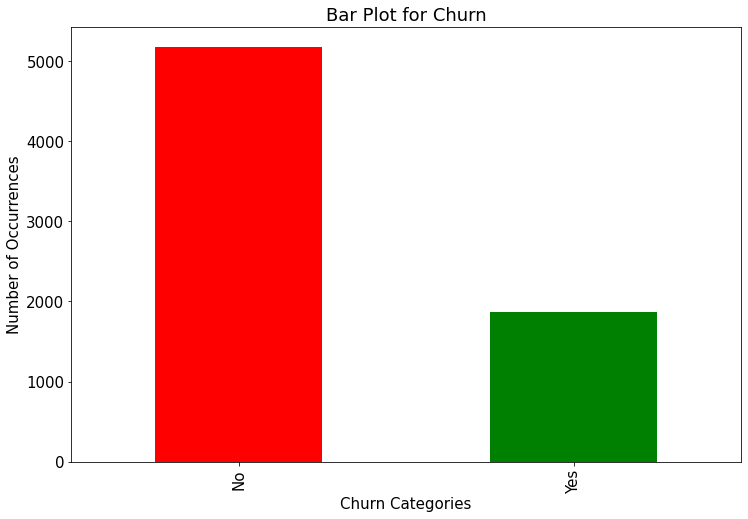

In [39]:
p1 = source_dataset['Churn'].value_counts().plot.bar(color=['red', 'green'])
plt.xlabel('Churn Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Churn')
# p1[0].set_color('r')

## Frequencies of various Years for the Column - "Date"

Text(0.5, 1.0, 'Bar Plot for Date (Years)')

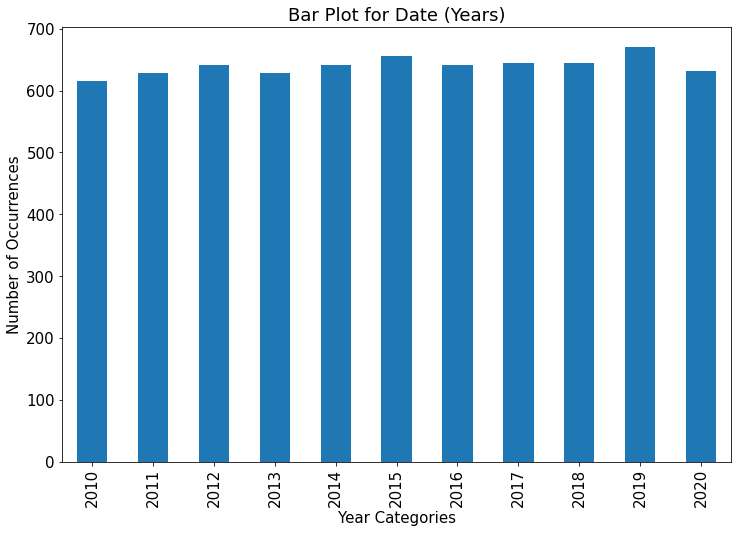

In [40]:
source_dataset["Date"] =  pd.to_datetime(source_dataset["Date"])
source_dataset["Date"].groupby(source_dataset["Date"].dt.year).count().plot(kind="bar")
plt.xlabel('Year Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Date (Years)')

## Frequencies of various Months for the Column - "Date"

Text(0.5, 1.0, 'Bar Plot for Date (Months)')

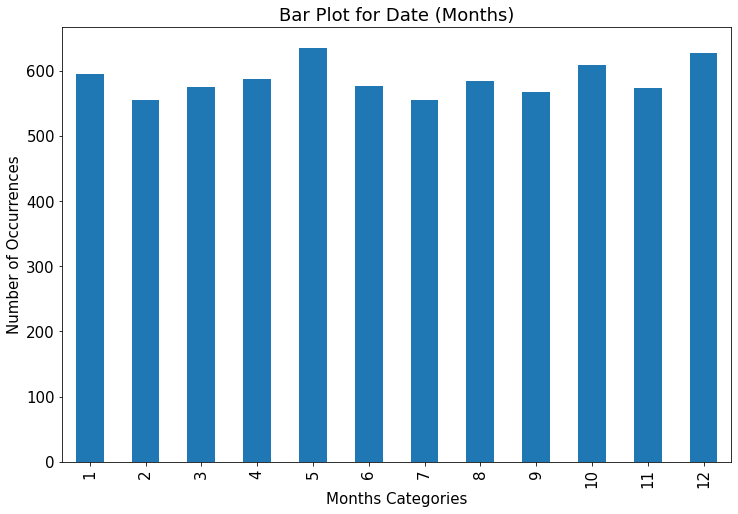

In [41]:
source_dataset["Date"] =  pd.to_datetime(source_dataset["Date"])
source_dataset["Date"].groupby(source_dataset["Date"].dt.month).count().plot(kind="bar")
plt.xlabel('Months Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Date (Months)')

# 1.C.Data Quality Issues, Plan and Preprocessing

## Missing values:

By referring to cells: [Data Quality Report -1](https://colab.research.google.com/drive/1U9RB_SuTsncYQUGqN6Vju_a5sKiqfouV#scrollTo=b-JiQ8PItHbB&line=9&uniqifier=1) and 
[Data Quality Report 2](https://colab.research.google.com/drive/1U9RB_SuTsncYQUGqN6Vju_a5sKiqfouV#scrollTo=woRDBEO_uLsm&line=11&uniqifier=1) (Continuous and Categorical) we can notice that the percentage of missing values across all features is zero, save the column - 'TotalCharges', where 0.16% of records **(~11 rows)**  are null.

In [42]:
source_dataset.isna().sum().sum()

11

### Rendering the 11 rows / customers whose TotaCharges is Null

In [43]:
source_dataset[source_dataset['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date
945,1371-DWPAZ,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),56.05,<NA>,No,2011-07-04
1731,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed Check,20.00,<NA>,No,2012-10-09
1906,2775-SEFEE,Male,0,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),61.90,<NA>,No,2013-01-13
2025,2923-ARZLG,Male,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Credit card (automatic),19.70,<NA>,No,2013-04-05
2176,3115-CZMZD,Male,0,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Two year,Yes,Electronic Check,20.25,<NA>,No,2013-06-16
2250,3213-VVOLG,Male,0,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,Yes,Electronic Check,25.35,<NA>,No,2013-07-30
2855,4075-WKNIU,Female,0,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Two year,Yes,Electronic Check,73.35,<NA>,No,2014-07-20
3052,4367-NUYAO,Male,0,Yes,Yes,Yes,DSL,No,Yes,No,No,Yes,Yes,Two year,Yes,Credit card (automatic),25.75,<NA>,No,2014-11-07
3118,4472-LVYGI,Female,0,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Two year,Yes,Electronic Check,52.55,<NA>,No,2014-12-13
4054,5709-LVOEQ,Female,0,Yes,Yes,No,Fiber optic,No,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),80.85,<NA>,No,2016-05-13


Since we have only 11 rows that contain Null values for 'TotalCharges' we will eliminate these rows as we have assumed that these rows would not affect our analysis and predictions in a significant manner.

In [44]:
source_dataset.dropna(inplace = True)

In [45]:
source_dataset.isna().sum().sum()

0

## Irregular Cardinality

The column 'SeniorCitizen' has a cardinality of 2, which is odd for a continuous feature, therefore we will be treating this column as a categorical feature.

## Churn

Let's convert the feature 'Churn' into numeric values

In [46]:
source_dataset['Churn'].replace(to_replace='Yes', value='1', inplace=True)
source_dataset['Churn'].replace(to_replace='No',  value='0', inplace=True)
source_dataset['Churn'] = source_dataset['Churn'].astype(int)
source_dataset.dtypes

customerID                  string
gender                      string
SeniorCitizen                Int64
Partner                     string
Dependents                  string
PhoneService                string
InternetService             string
OnlineSecurity              string
OnlineBackup                string
DeviceProtection            string
TechSupport                 string
StreamingTV                 string
StreamingMovies             string
Contract                    string
PaperlessBilling            string
PaymentMethod               string
MonthlyCharges             Float64
TotalCharges               Float64
Churn                        int64
Date                datetime64[ns]
dtype: object

In [47]:
source_dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic Check,65.60,593.30,0,2010-01-01
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,59.90,542.40,0,2010-01-01
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.90,280.85,1,2010-01-01
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),98.00,1237.85,1,2010-01-02
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,83.90,267.40,1,2010-01-03
5,0013-MHZWF,Female,0,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed Check,69.40,571.45,0,2010-01-03
6,0013-SMEOE,Female,1,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),109.70,7904.25,0,2010-01-04
7,0014-BMAQU,Male,0,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,84.65,5377.80,0,2010-01-04
8,0015-UOCOJ,Female,1,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.20,340.35,0,2010-01-06
9,0016-QLJIS,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,90.45,5957.90,0,2010-01-06


# Tenure

The Feature 'Tenure' is calculated by determining the difference between a customer's 'join_date'/'Date' and a baseline Date. We have considered our baseline date to be `May-30-2021`.

**Let's now add a new column - 'Tenure' to the dataframe**

In [48]:
print(source_dataset["Date"].max())
print(source_dataset["Date"].min())

2020-12-30 00:00:00
2010-01-01 00:00:00


In [49]:

import datetime

end_date = datetime.date(2021, 5, 30)
print(end_date)
source_dataset["End_date"] = end_date
source_dataset.head(10)

2021-05-30


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,End_date
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic Check,65.60,593.30,0,2010-01-01,2021-05-30
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,59.90,542.40,0,2010-01-01,2021-05-30
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.90,280.85,1,2010-01-01,2021-05-30
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),98.00,1237.85,1,2010-01-02,2021-05-30
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,83.90,267.40,1,2010-01-03,2021-05-30
5,0013-MHZWF,Female,0,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed Check,69.40,571.45,0,2010-01-03,2021-05-30
6,0013-SMEOE,Female,1,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),109.70,7904.25,0,2010-01-04,2021-05-30
7,0014-BMAQU,Male,0,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,84.65,5377.80,0,2010-01-04,2021-05-30
8,0015-UOCOJ,Female,1,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.20,340.35,0,2010-01-06,2021-05-30
9,0016-QLJIS,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,90.45,5957.90,0,2010-01-06,2021-05-30


In [50]:
source_dataset["Tenure"] = (pd.to_datetime(source_dataset.End_date) - pd.to_datetime(source_dataset.Date)).dt.days
source_dataset.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,End_date,Tenure
7033,9975-SKRNR,Male,0,No,No,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),18.90,18.90,0,2020-12-26,2021-05-30,155
7034,9978-HYCIN,Male,1,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),84.95,4018.05,0,2020-12-27,2021-05-30,154
7035,9979-RGMZT,Female,0,No,No,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),94.05,633.45,0,2020-12-27,2021-05-30,154
7036,9985-MWVIX,Female,0,No,No,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),70.15,70.15,1,2020-12-27,2021-05-30,154
7037,9986-BONCE,Female,0,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1,2020-12-28,2021-05-30,153
7038,9987-LUTYD,Female,0,No,No,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),55.15,742.90,0,2020-12-28,2021-05-30,153
7039,9992-RRAMN,Male,0,Yes,No,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),85.10,1873.70,1,2020-12-29,2021-05-30,152
7040,9992-UJOEL,Male,0,No,No,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Month-to-month,No,Credit card (automatic),50.30,92.75,0,2020-12-29,2021-05-30,152
7041,9993-LHIEB,Male,0,Yes,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),67.85,4627.65,0,2020-12-30,2021-05-30,151
7042,9995-HOTOH,Male,0,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Two year,No,Credit card (automatic),59.00,3707.60,0,2020-12-30,2021-05-30,151


## Note: We will be transforming the Dataframe **after performing Exploratory Data Analysis** by performing operations such as One-hot encoding.

# Exploratory Data Analysis

## Customer Attrition / Churn Distribution:

Let's visualize the percentage of customers who have retained their subscriptions or deactivated it. *italicized text*

**References:**
[Pie Charts with Plotly](https://plotly.com/python/pie-charts/)

In [51]:
import plotly.express as px
fig = px.pie(source_dataset, names = 'Churn', template = 'seaborn',
            title = 'Churn')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

Churn We can observe that **26.6%** of the customers have deactivated their plans, which is around **1873 out of 7043** customers.

In [52]:
print(26.6/100*7043)

1873.438


## Distribution of Senior Citizens

**References:**
[Pie Charts with Matplotlib](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm)

(-1.1059512938819451,
 1.1065875007007335,
 -1.1055497655464688,
 1.1002643080914476)

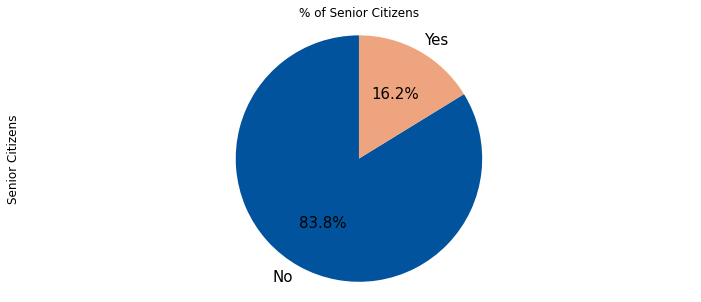

In [53]:
import matplotlib as mpl
colors = ['#00539CFF', '#EEA47FFF']
mpl.rcParams.update({'text.color' : "black"})
labels = 'No', 'Yes'
plt.figure(figsize = (12,5))
ax = ((source_dataset['SeniorCitizen'].value_counts()/len(source_dataset['SeniorCitizen']))*100).plot.pie(labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = colors)
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
ax.axis('equal')

**We can observe that around 16% of customers are Senior Citizens whereas the rest are regular adults.**

## Distribution of Customers by Tenure

**References:**
[Seaborn Distribution Plots](https://seaborn.pydata.org/generated/seaborn.displot.html)

Text(0.5, 1.0, 'Distribution of Customers by Tenure')

<Figure size 720x360 with 0 Axes>

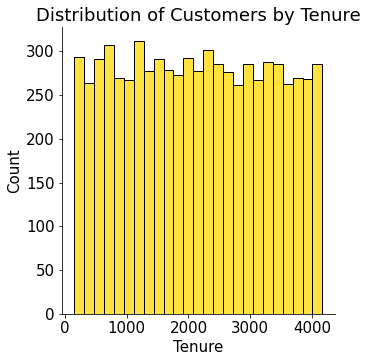

In [54]:
import seaborn as sb
colors = ['gold', 'silver']
sb.set_palette(sb.color_palette(colors))
plt.figure(figsize = (10,5))

ax = sb.displot(source_dataset["Tenure"], kde = False, bins = 25)
plt.title('Distribution of Customers by Tenure')


## Tenure Vs Contract Type

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

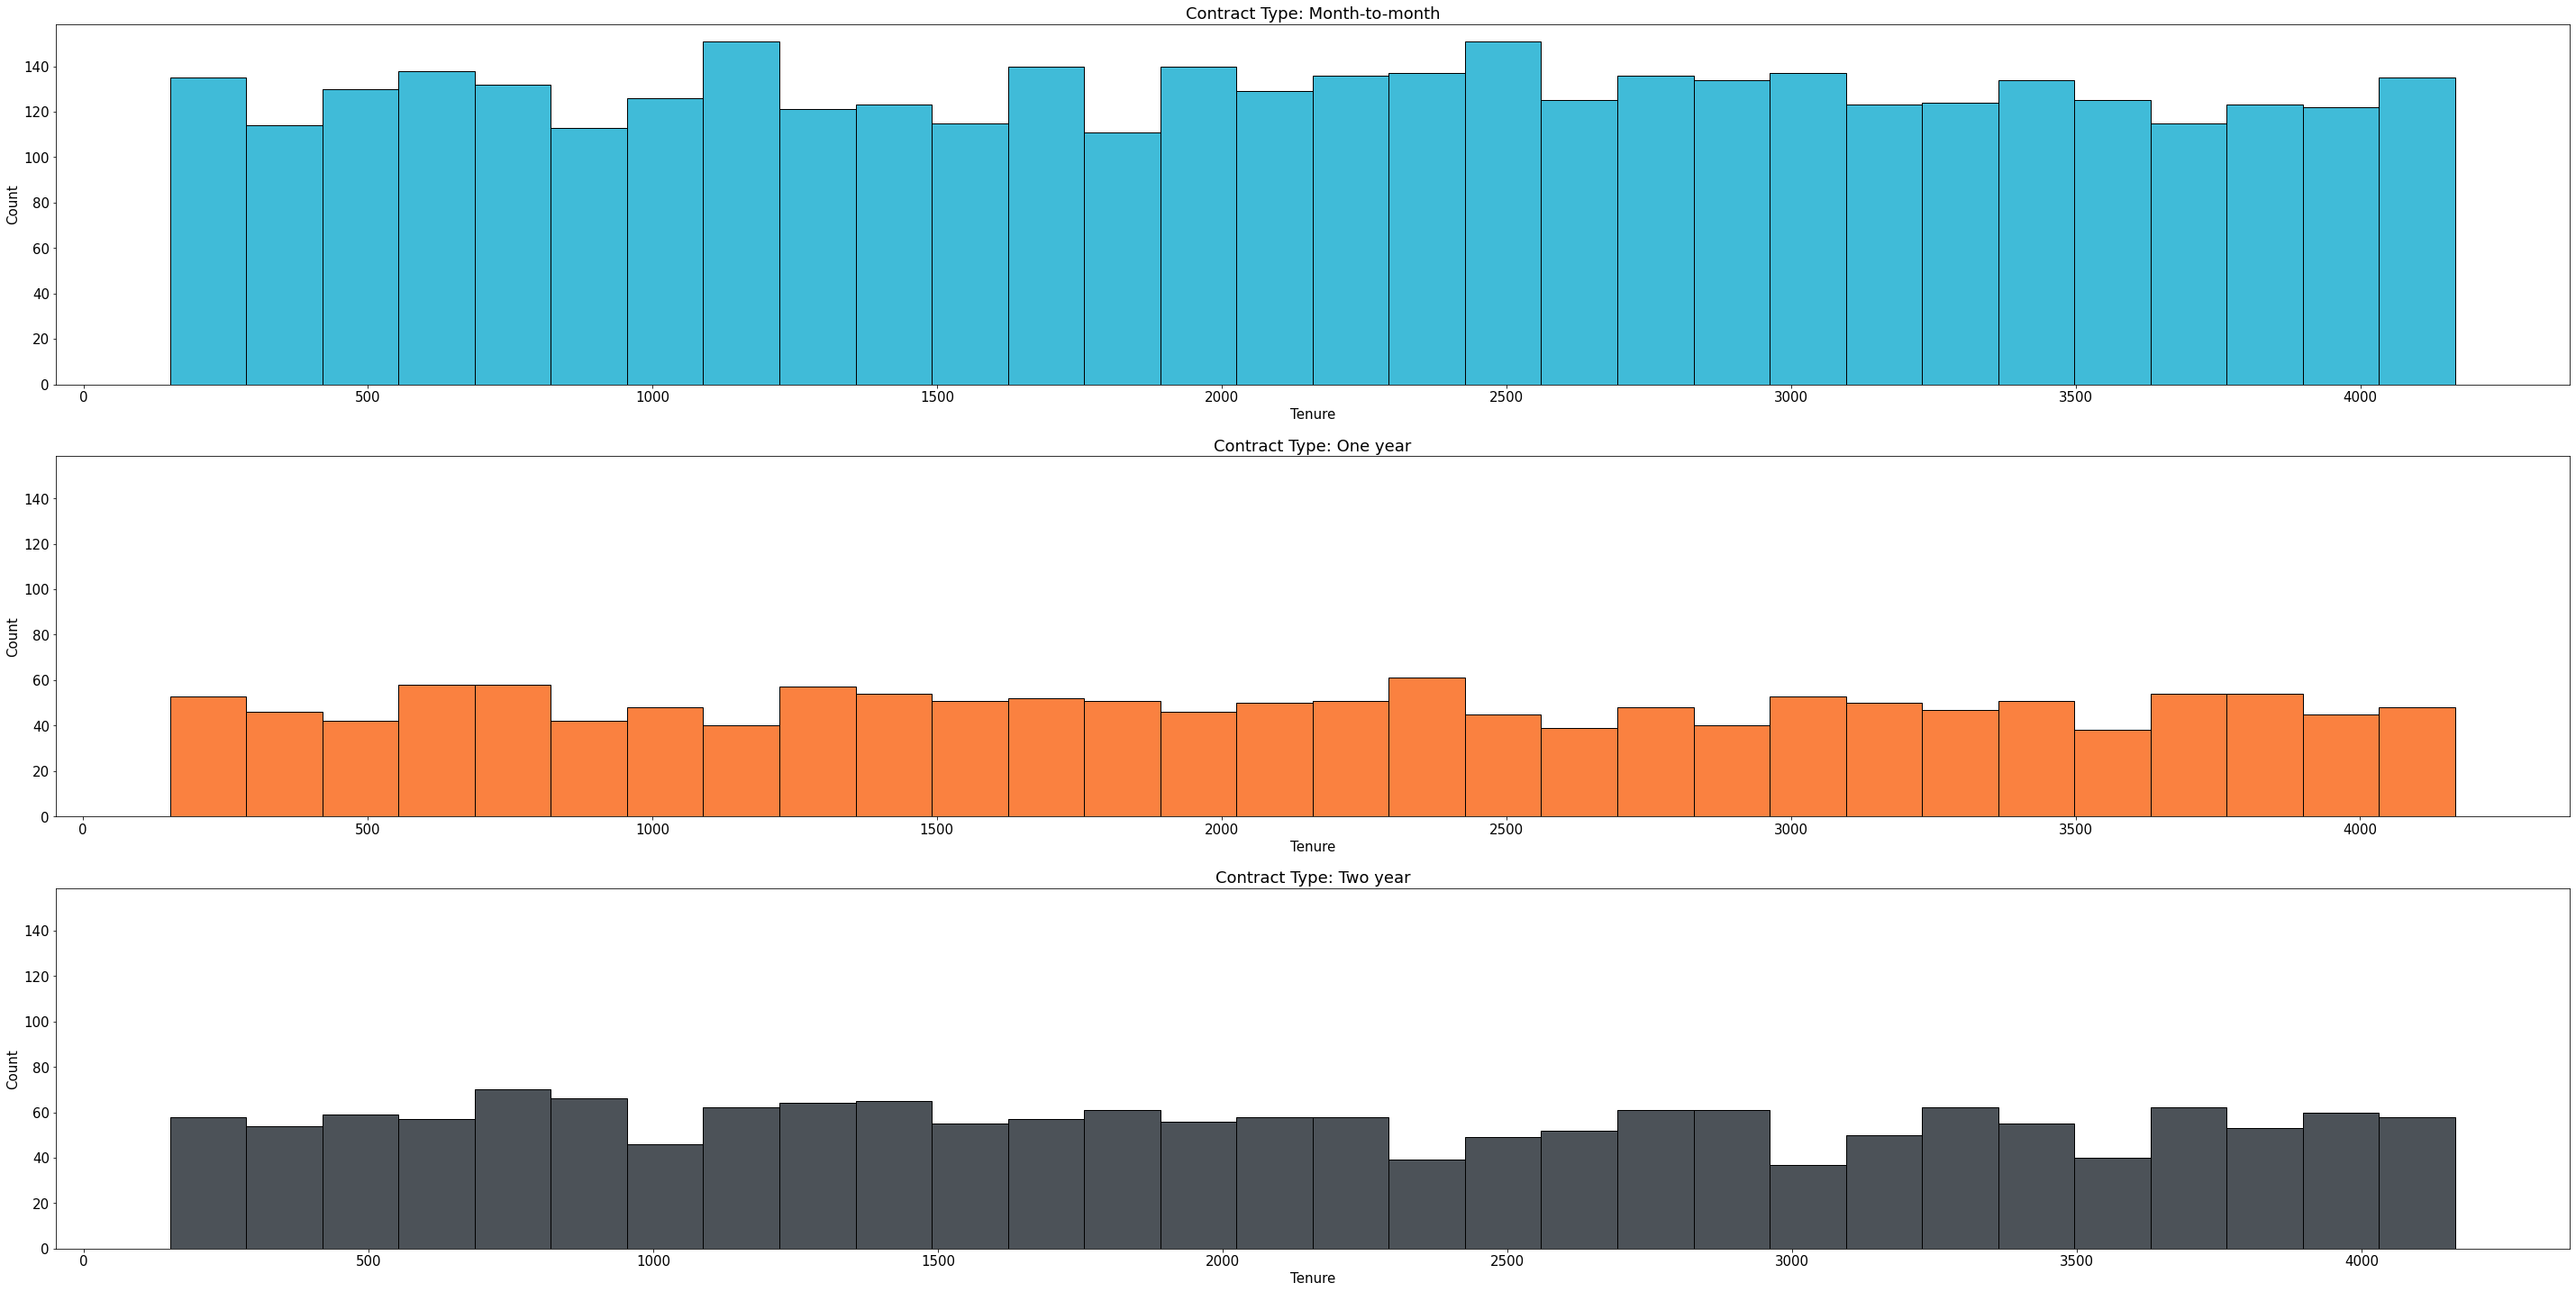

In [55]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, sharey = True, figsize=(50,25))

cols = ['Month-to-month', 'One year', 'Two year']
colors = ['#00A4CCFF', '#F95700FF','#101820FF']
for i, col in enumerate(cols):
    ax = sb.histplot(source_dataset[source_dataset['Contract'] == col]['Tenure'], kde = False, bins = 30, ax = axs[i], color = colors[i])
    ax.set_title('Contract Type: ' + col)

From the charts, we can observe that the number of customers with high tenure is predominant for the 'month-month' contract type.

## Churn Vs Contract Type

O Refers to 'No' / which means that the Customer has an active subscription with the organization.

1 Refers to 'Yes' / which means that the Customer has unsubscribed from the origanization's plan.

Text(0.5, 1.0, 'Churn Vs Contract Type Distribution ')

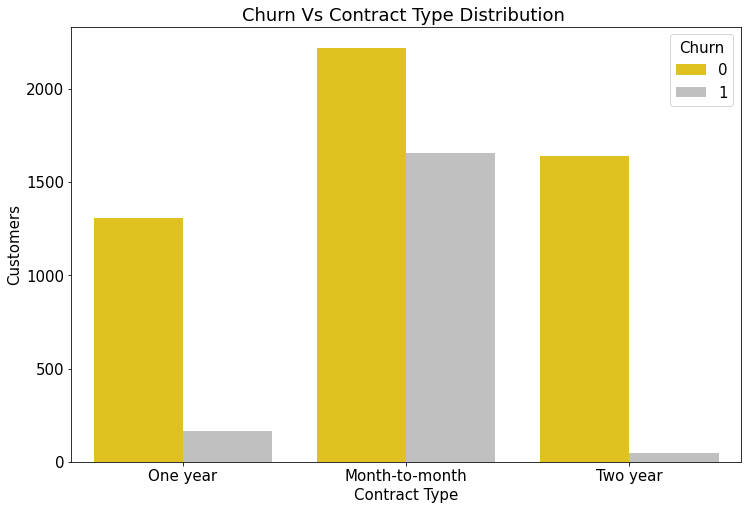

In [56]:
ax = sb.countplot(data = source_dataset, x = 'Contract', hue = 'Churn')

ax.set_ylabel('Customers')
ax.set_xlabel('Contract Type')
ax.set_title('Churn Vs Contract Type Distribution ')

From the graph, we can observe that 'Month-to-Month' contracts have the highest customer retention as well as highest cutomer attrition among all the contract types.

## Churn Vs Total Charges and Monthly Charges

**References:**
[Seaborn KDE Plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Text(0.5, 1.0, 'Churn Vs Total Charges')

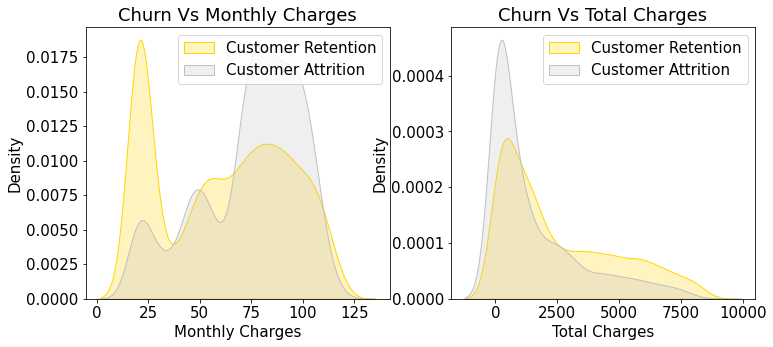

In [57]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))


ax = sb.kdeplot(source_dataset.MonthlyCharges[(source_dataset["Churn"] == 0) ],
                ax = axs[0],shade = True)
ax = sb.kdeplot(source_dataset.MonthlyCharges[(source_dataset["Churn"] == 1) ],
                ax = axs[0], shade= True)

ax.legend(["Customer Retention","Customer Attrition"],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Churn Vs Monthly Charges')



ax = sb.kdeplot(source_dataset.TotalCharges[(source_dataset["Churn"] == 0) ],
                ax = axs[1],shade = True)
ax = sb.kdeplot(source_dataset.TotalCharges[(source_dataset["Churn"] == 1) ],
                ax = axs[1], shade= True)

ax.legend(["Customer Retention","Customer Attrition"],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Churn Vs Total Charges')

By observing the variations of the plot in both the graphs, we can come to a conclusion that the feature Monthly Charges is important for Determining Customer Churn or Attrition. The Feature Total Charges, however, doesn't represent much variation.

## Distribution of customers for various services availed and comparison with  the number of customers who cancelled their subscription (Churn)

### Phone Service Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

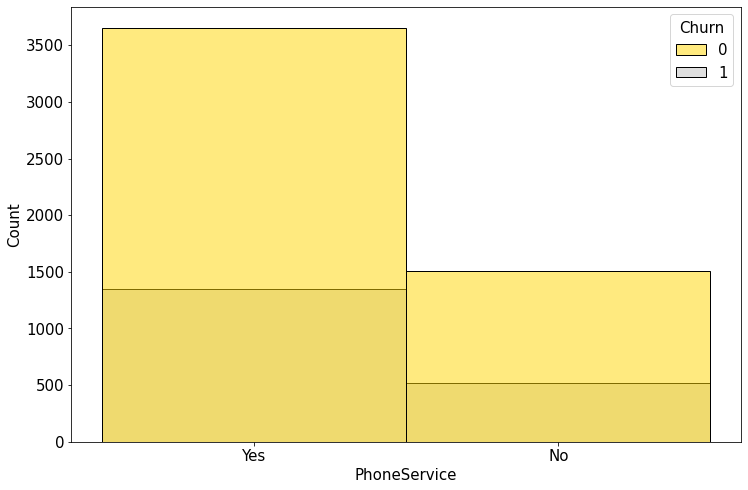

In [58]:
sb.histplot(data=source_dataset,x="PhoneService",hue='Churn')

From the graph above, we can observe that customers who had availed Phone Service are more in number than those who did not opt for Phone Service.

### Internet Service Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

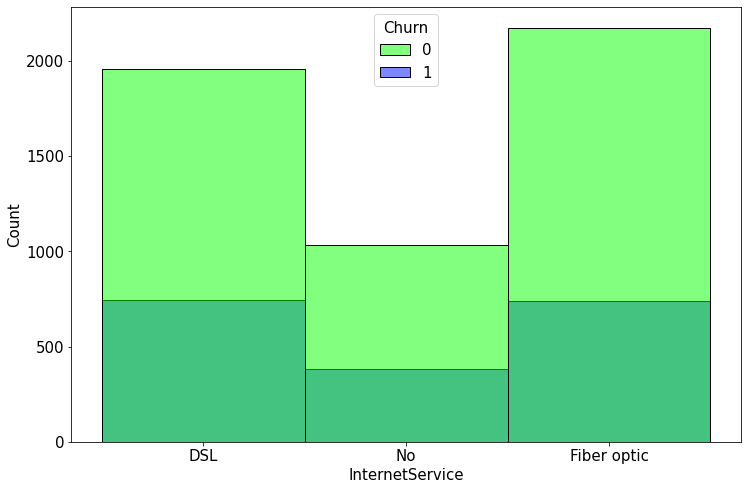

In [59]:
sb.histplot(data=source_dataset,x="InternetService",hue='Churn', palette='hsv')

From the graph above, we can observe that customers who had availed Fibre Optic and DSL Service have a higher customer retention value than those who did not opt for Internet Service.

### Online Service Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

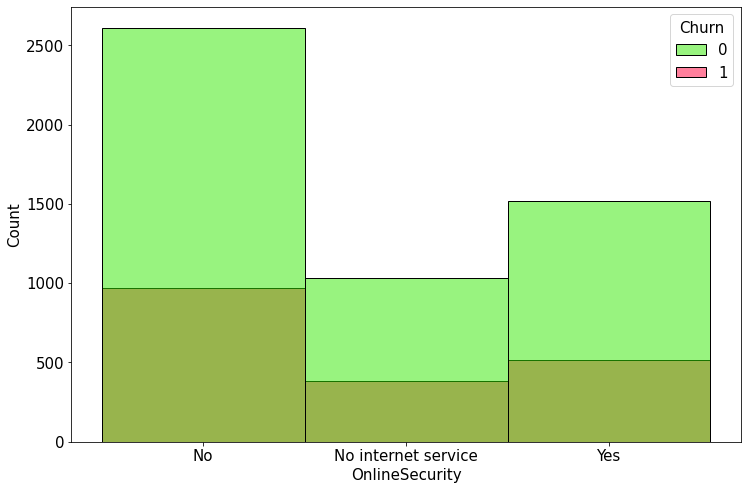

In [60]:
sb.histplot(data=source_dataset,x='OnlineSecurity',hue='Churn', palette='prism')

From the graph above, we can observe that customers who didn't purchase Online Security features have lower churn values than those who did.

### Internet Online Backup Service Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

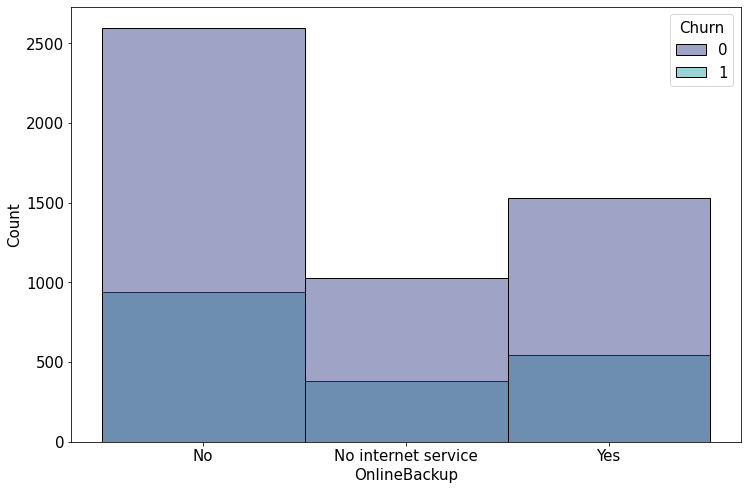

In [61]:
sb.histplot(data=source_dataset,x="OnlineBackup",hue='Churn', palette='mako')

From the graph above, we can observe that customers who did not purchase Online Backup service tend to keep their subscriptions active than than those who did.

### No Internet Service Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

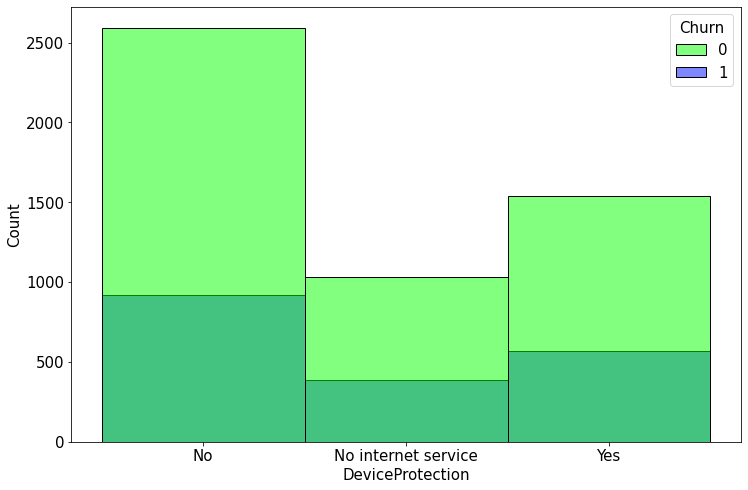

In [62]:
sb.histplot(data=source_dataset,x="DeviceProtection",hue='Churn', palette='hsv')

From the graph above, we can observe that customers who did not purchase Device Protection service tend to keep their subscriptions active than than those who did.

### Tech Support Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

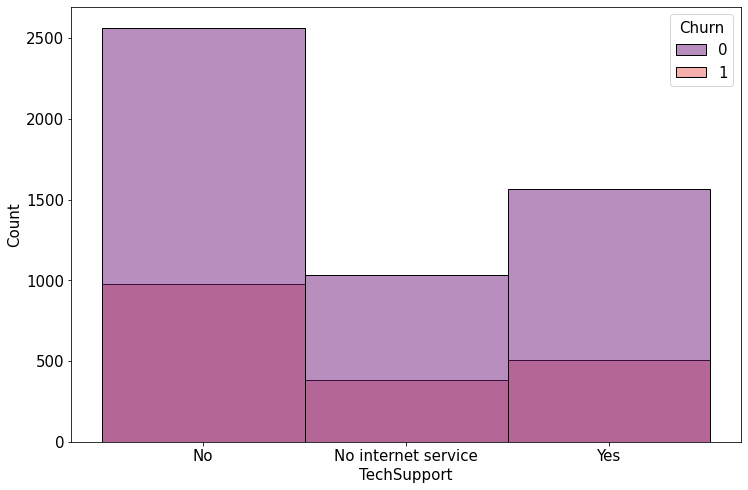

In [63]:
sb.histplot(data=source_dataset,x="TechSupport",hue='Churn', palette='magma')

From the graph above, we can observe that customers who did not purchase Device Protection service tend to keep their subscriptions active than than those who did.

### Streaming TV Vs Churn

**References:**
[Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

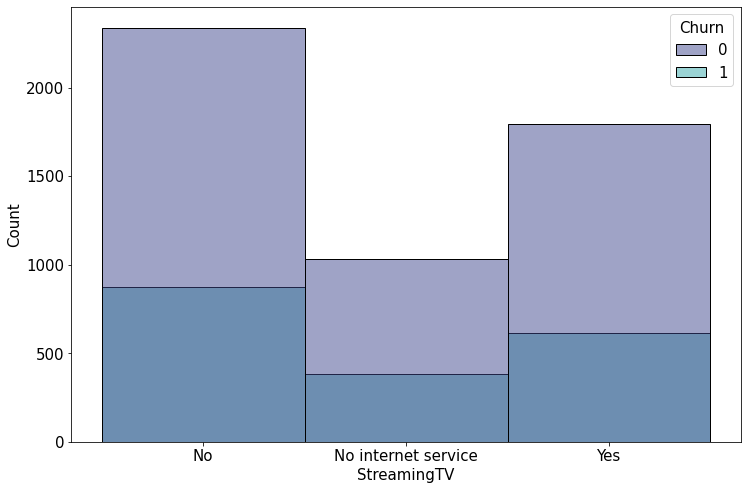

In [64]:
sb.histplot(data=source_dataset,x='StreamingTV',hue='Churn', palette='mako')

From the graph above, we can observe that customers who did not purchase Streaming TV service tend to keep their subscriptions active than than those who did.

## Correlation Between the features in the dataset
### Let's determine the correlation between all the features in the dataframe

In [65]:
source_dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,End_date,Tenure
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic Check,65.60,593.30,0,2010-01-01,2021-05-30,4167
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,59.90,542.40,0,2010-01-01,2021-05-30,4167
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.90,280.85,1,2010-01-01,2021-05-30,4167
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),98.00,1237.85,1,2010-01-02,2021-05-30,4166
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,83.90,267.40,1,2010-01-03,2021-05-30,4165
5,0013-MHZWF,Female,0,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed Check,69.40,571.45,0,2010-01-03,2021-05-30,4165
6,0013-SMEOE,Female,1,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),109.70,7904.25,0,2010-01-04,2021-05-30,4164
7,0014-BMAQU,Male,0,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,84.65,5377.80,0,2010-01-04,2021-05-30,4164
8,0015-UOCOJ,Female,1,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.20,340.35,0,2010-01-06,2021-05-30,4162
9,0016-QLJIS,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic Check,90.45,5957.90,0,2010-01-06,2021-05-30,4162


## Let's perform 'one-hot encoding' to determine the correlation between features and subsequently build models to predict customer churn.

In [66]:
#categorical data
categorical_cols = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']


#import pandas as pd
transformed_df = pd.get_dummies(source_dataset, columns = categorical_cols)
transformed_df.head(5)

,customerID,MonthlyCharges,TotalCharges,Churn,Date,End_date,Tenure,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0002-ORFBO,65.60,593.30,0,2010-01-01,2021-05-30,4167,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,0003-MKNFE,59.90,542.40,0,2010-01-01,2021-05-30,4167,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0004-TLHLJ,73.90,280.85,1,2010-01-01,2021-05-30,4167,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0011-IGKFF,98.00,1237.85,1,2010-01-02,2021-05-30,4166,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0013-EXCHZ,83.90,267.40,1,2010-01-03,2021-05-30,4165,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


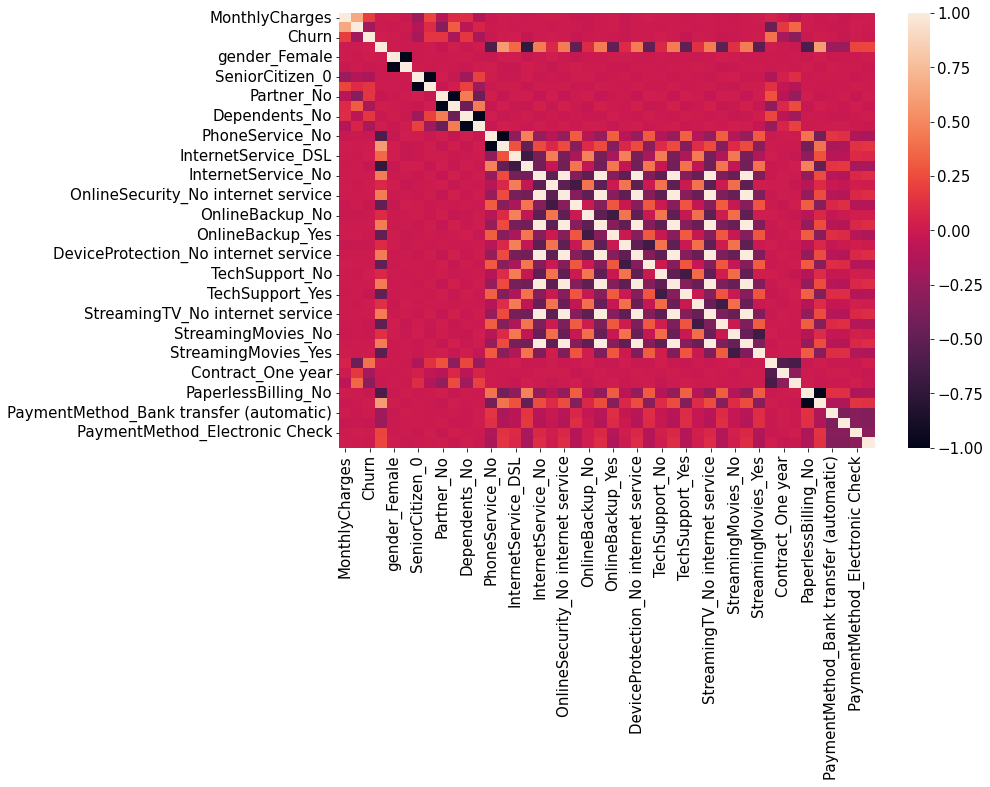

In [67]:
transformed_df.style
import matplotlib.pyplot as plt
import seaborn as sb
dataplot=sb.heatmap(transformed_df.corr())
plt.show()

## Let's determine the correlation between 'Churn' and the other features in the dataframe

**References:**

1. [Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

2. [Sort Bar Plots by a Column's values](https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column)

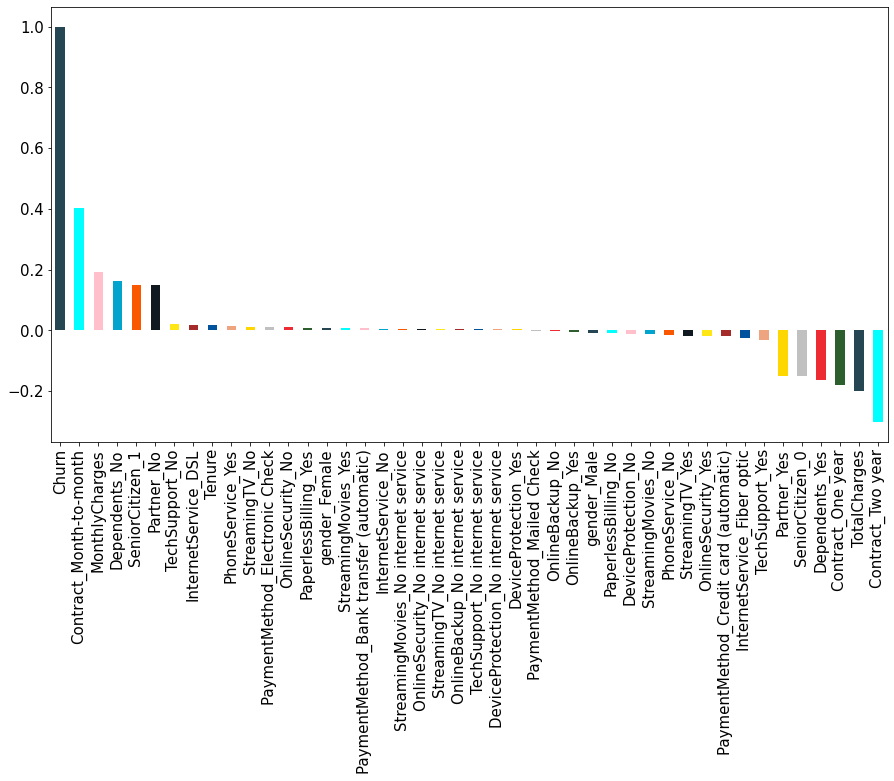

In [68]:
plt.figure(figsize=(15,8))
colors = ['#264653','cyan', 'pink','#00A4CCFF', '#F95700FF','#101820FF', '#FEE715FF', 'brown','#00539CFF', '#EEA47FFF','gold', 'silver','#ED2B33FF', '#2C5F2D']
transformed_df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', color = colors)

From the plots above, we can observe that the Correlation between Churn and the following features, is significant:
1. Contract_Month_to_Month
2. Monthly_Charges
3. Dependents (No / Yes)
4. Senior Citizen (No / Yes)
5. Partner (No / Yes)

## Feature Transformation

In [69]:
transformed_df.head(5)

,customerID,MonthlyCharges,TotalCharges,Churn,Date,End_date,Tenure,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0002-ORFBO,65.60,593.30,0,2010-01-01,2021-05-30,4167,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,0003-MKNFE,59.90,542.40,0,2010-01-01,2021-05-30,4167,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0004-TLHLJ,73.90,280.85,1,2010-01-01,2021-05-30,4167,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0011-IGKFF,98.00,1237.85,1,2010-01-02,2021-05-30,4166,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0013-EXCHZ,83.90,267.40,1,2010-01-03,2021-05-30,4165,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


### Before we perform feature selection let us drop columns that are obviously irrelevant to churn prediction as these features might have an adverse effect on the model.

### Let's also seprarate the Target Feature (Churn) from the Input Features.

In [102]:
Y=transformed_df.Churn
X=transformed_df.drop(['Churn','customerID','Date','End_date'],axis=1).astype(float)
print(type(X))
X.head(5)

<class 'pandas.core.frame.DataFrame'>


,MonthlyCharges,TotalCharges,Tenure,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,65.60,593.30,4167.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,59.90,542.40,4167.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,73.90,280.85,4167.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,98.00,1237.85,4166.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,83.90,267.40,4165.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [103]:
Y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Churn, dtype: int64

## Most of our features have been transformed through one-hot encoding. However we still need to normalize **'Tenure', 'Monthly Charges' and 'Total Charges'**.

## We will use Min/Max Normalization to normalize these features.

In [104]:
X = (X-X.min()) / (X.max()-X.min())
X.head(5)

,MonthlyCharges,TotalCharges,Tenure,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.47,0.07,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.41,0.06,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.55,0.03,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,0.79,0.14,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,0.65,0.03,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


# 2.Baseline Model

## Feature Selection

**References**:

[Feature Selection with Chi-squared score function](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X, Y)
# Get columns to keep and create new dataframe with the K best columns
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]

print(X.shape)
print("\n")
print(X.columns)
print("\n")
print(Y.shape)

(7032, 15)


Index(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_Fiber optic', 'TechSupport_No', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')


(7032,)




---


The following features are selected as the Input Columns for training and testing the model:

'MonthlyCharges',

'TotalCharges',

'SeniorCitizen_0',

'SeniorCitizen_1',

'Partner_No',

'Partner_Yes',

'Dependents_No',

'Dependents_Yes',

'InternetService_Fiber optic',

'TechSupport_No',

'TechSupport_Yes',

'Contract_Month-to-month',

'Contract_One year',

'Contract_Two year',

'PaymentMethod_Credit card (automatic)'

## Training and evaluate the model on test data

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(5625, 15)
(1407, 15)


In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_y_predict = ab.predict(X_test)

## Confusion Matrix for our AdaBoost Model

**References**:

[Confusion Matrix - Python](https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464)

Accuracy: 79.25%
Precision: 62.84%
Recall: 55.17%
F1_Score: 58.76%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

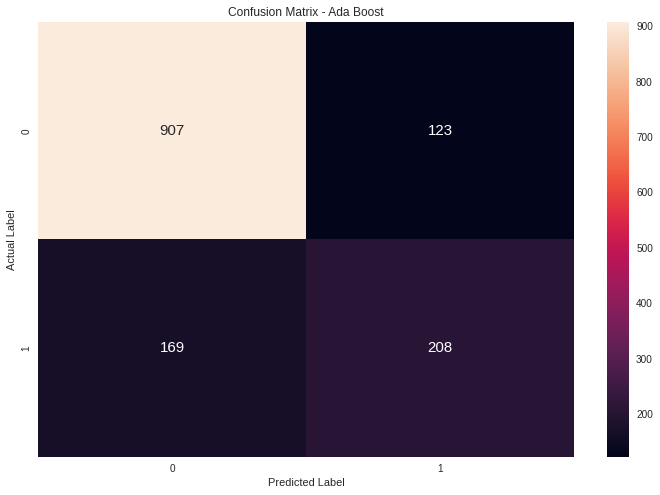

In [108]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, ab_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, ab_y_predict) * 100))
confusion_matrix_ab = confusion_matrix(y_test, ab_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sb.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Hyperparameter Tuning

**References**:

[AdaBoost Hyperparameter Tuning](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

In [80]:
# Tuning Ada Boost
grid = {'n_estimators' : [50,100,500,1500,2000],
       'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0]}

cv = ShuffleSplit()
adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions = grid,
                             cv = cv,
                             n_iter = 10,
                             scoring = 'recall')
adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall')

In [81]:
adaboost.best_params_

{'learning_rate': 0.2, 'n_estimators': 2000}

In [82]:
tune_adaboost = AdaBoostClassifier(**adaboost.best_params_)
tune_adaboost.fit(X_train, y_train)
y_pred = tune_adaboost.predict(X_test)

Accuracy: 78.96%
Precision: 62.94%
Recall: 52.25%
F1_Score: 57.10%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

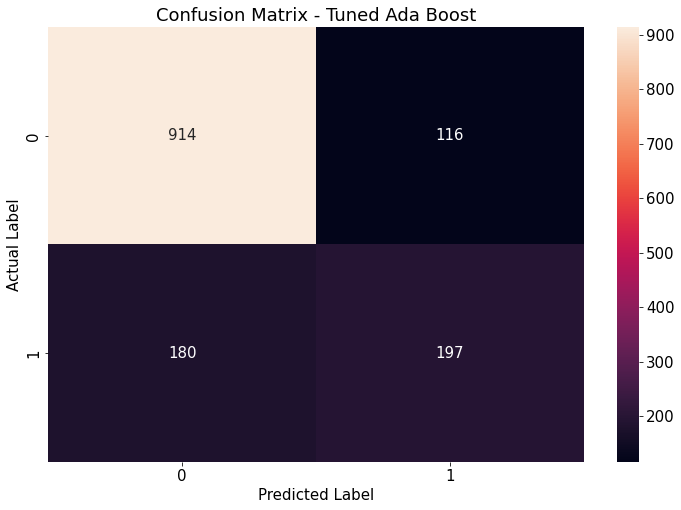

In [84]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_tuned_adaboost = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sb.heatmap(confusion_matrix_tuned_adaboost, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Let us plot the learning curve for our AdaBoost model

**References**:

[Assignment -1](https://dal.brightspace.com/d2l/lms/dropbox/user/folders_history.d2l?db=151135&grpid=227460&isprv=0&bp=0&ou=221741)

Mean training scores

 1      -0.00
100     0.03
500     0.17
2000    0.19
3000    0.20
3500    0.20
dtype: float64

 --------------------

Mean validation scores

 1      0.50
100    0.33
500    0.23
2000   0.21
3000   0.21
3500   0.21
dtype: float64


(0.0, 0.5)

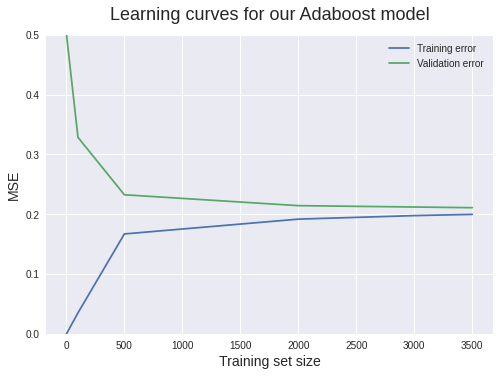

In [116]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 3000,3500,]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = ab,
X = X,
y = Y, train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1) #Changed the sign of the mean validation scores
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for our Adaboost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

#3. Neural Networks Model

**References:**

[Churn Prediction with Neural Networks](https://www.analyticsvidhya.com/blog/2021/10/customer-churn-prediction-using-artificial-neural-network/)

## The task that we are solving is relevant to `Classification` where we will be training a model and testing it `(Supervised Learning)` to predict customer churn (whether a customer will choose to continue their subscription or cancel it, in this scenario).

## Feature Selection

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X, Y)
# Get columns to keep and create new dataframe with the K best columns
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]

print(X.shape)
print("\n")
print(X.columns)
print("\n")
print(Y.shape)

(7032, 15)


Index(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_Fiber optic', 'TechSupport_No', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')


(7032,)




---


The following features are selected as the Input Columns for training and testing the model:

`MonthlyCharges`,

`TotalCharges`,

`SeniorCitizen_0`,

`SeniorCitizen_1`,

`Partner_No`,

`Partner_Yes`,

`Dependents_No`,

`Dependents_Yes`,

`InternetService_Fiber optic`,

`TechSupport_No`,

`TechSupport_Yes`,

`Contract_Month-to-month`,

`Contract_One year`,

`Contract_Two year`,

`PaymentMethod_Credit card (automatic)`

## Training and evaluating the model on test data

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(5625, 15)
(1407, 15)


In [119]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # input layer
    keras.layers.Dense(15, input_shape=(15,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [129]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 6ms/step - loss: 0.4023 - accuracy: 0.8078 - val_loss: 0.4360 - val_accuracy: 0.7953
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4019 - accuracy: 0.8071 - val_loss: 0.4393 - val_accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4025 - accuracy: 0.8044 - val_loss: 0.4385 - val_accuracy: 0.7903
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4022 - accuracy: 0.8041 - val_loss: 0.4390 - val_accuracy: 0.7910
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4024 - accuracy: 0.8053 - val_loss: 0.4387 - val_accuracy: 0.7932
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4008 - accuracy: 0.8096 - val_loss: 0.4409 - val_accuracy: 0.7896
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8064 - val_loss: 0.4415 - val_accuracy: 0.7953

## Evaluating the model on the test dataset

In [121]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7925


[0.42869895696640015, 0.7924662232398987]

## Plots for Training Accuracy and Validation Accuracy

**References:**

[Training & Validation Accuracy for Neural Network Model](https://vitalflux.com/python-keras-learning-validation-curve-classification-model/)

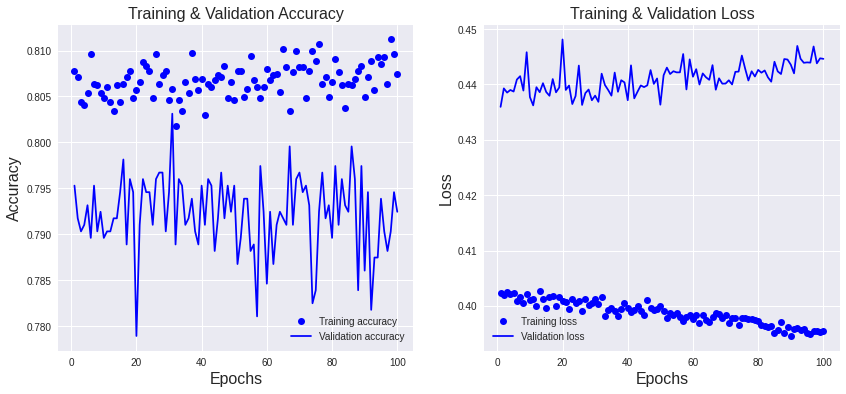

In [130]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [122]:
# predict the churn values
ypred = model.predict(X_test)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[[0.26455832]
 [0.57913214]
 [0.7634145 ]
 ...
 [0.07857111]
 [0.2118667 ]
 [0.42824316]]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [123]:
data = {'orignal_churn':y_test, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
4256,0,0
2916,1,1
1565,1,1
5228,1,0
4429,0,0
5881,0,1
155,1,0
109,1,0
5025,0,0
5258,0,0


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.63      0.54      0.58       377

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(132.0, 0.5, 'Actual Churn Value')

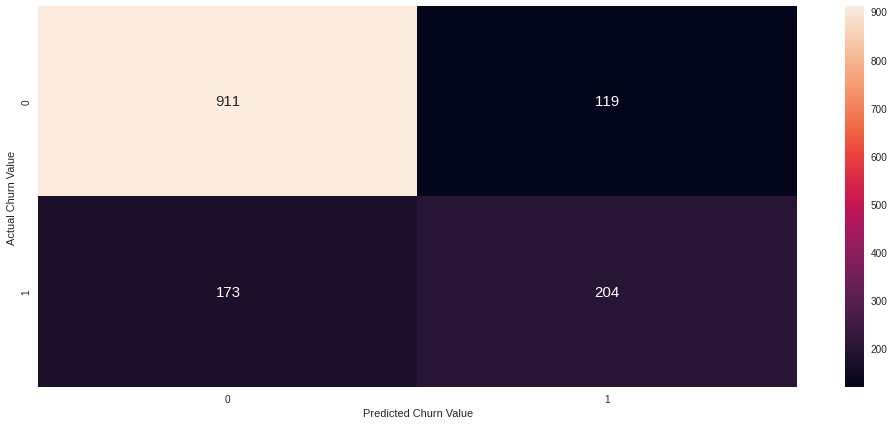

In [124]:
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(y_test,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted Churn Value')
plt.ylabel('Actual Churn Value')

From the confusion matrix we can derieve the following observations:


True Negatives: 911 - This means that the model classified 911 instances where Churn is False, correclty.

True Positives: 204 - This means that the model classified 204 instances where Churn is True, correclty.

False Negatives: 173 - The model classified 173 instances as "False" when the Churn for those instances were actually "True"

False Positives: 119 - The model classified 119 instances as "True" when the Churn for those instances were actually "False"

# 4. Concept Drift Detection

“In predictive analytics and machine learning, concept drift means that the statistical properties of the target variable, which the model is trying to predict, change over time in unforeseen ways. This causes problems because the predictions become less accurate as time passes.”

For this Assignment, we have used ADWIN (ADaptive WINdowing) to detect Concept Drift.


**References:**

1. [Concept drift](https://en.wikipedia.org/wiki/Concept_drift)

2. [Tutorial 9](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3058459/View)

In [132]:
pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 19.9 MB/s 


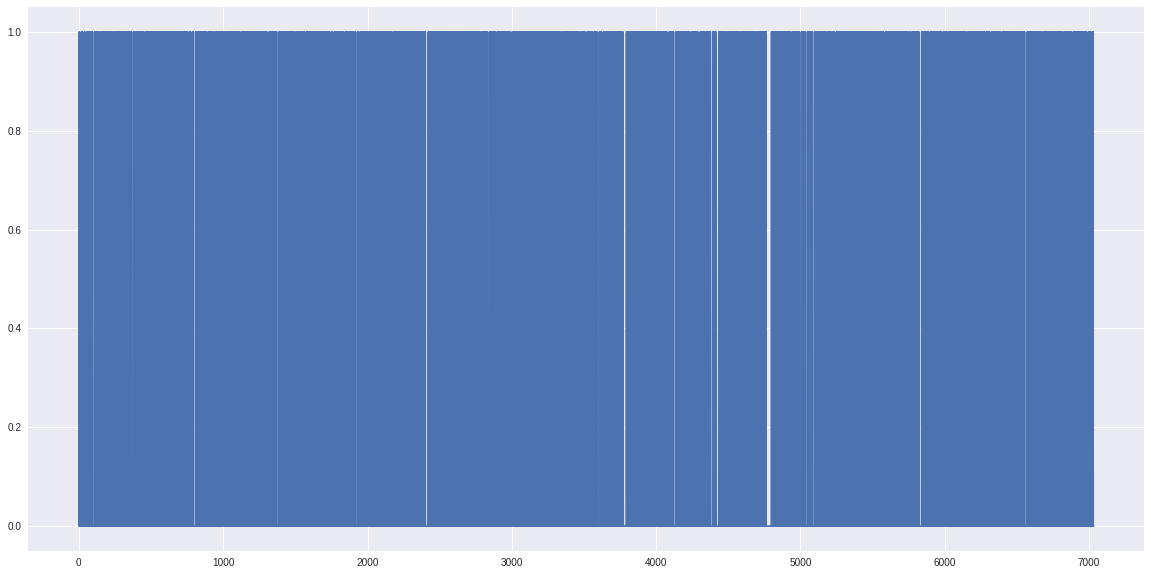

In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skmultiflow.drift_detection import ADWIN

plt.figure(figsize=(20, 10))
plt.plot(Y.values.tolist())

adwin = ADWIN()

for i in range(Y.size):
    adwin.add_element(Y.values.tolist()[i])
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

From the Chart above, we can conclude that there's no change in the properties of the Target Feature over Time. Therefore there's no Concept Drift in the dataset.

Concept drift is significantly more likely to occur in a static machine learning process. A static model, which is often trained in an offline or local environment, won't adapt to altering environments or scenarios. A static algorithm created from historical data might deteriorate with time and become unreliable for models that deal with forecasting or predictions. To stay current with changing datasets and real-world settings, models that are considered to be at danger from idea drift should be routinely retrained and updated.

**Reference:**

[Machine Learning & Concept Drift](https://www.seldon.io/machine-learning-concept-drift)

## Suppose the dataset exhibited Concept Drift, 

Ideally in the case where the dataset exhibits Concept Drift, we would have implemented either of the following approaches to handle it:

1. We would update and train the model with samples of new training data. This would fine-tune the model and lower the risk of it becoming obsolete over time.
2. We would have manipulated the relative importance of different input data by assigning weights accordingly. For instance we would have applied a larger weightage for input which's more recent and lesser weights to historic data. This will emphasise the importance of new data within the algorithm, adding less weight to historic data which may be out-of-date.

# References

1. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View

2. https://dal.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fe8e7287-82c2-42bc-85ac-ae940127b726
https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View

3. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View

4. https://plotly.com/python/pie-charts/

5. https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm

6. https://seaborn.pydata.org/generated/seaborn.displot.html

7. https://seaborn.pydata.org/generated/seaborn.histplot.html

8. https://seaborn.pydata.org/generated/seaborn.kdeplot.html

9. https://seaborn.pydata.org/generated/seaborn.histplot.html

10. https://stackoverflow.com/questions/40902958/andas-dataframe-bar-plot-with-sort-values-by-other-column

11. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.electKBest.html

12. https://towardsdatascience.com/achine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464

13. https://machinelearningmastery.com/rid-search-hyperparameters-deep-learning-models-python-keras/

14. https://dal.brightspace.com/d2l/lms/dropbox/user/folders_history.d2l?db=151135&rpid=227460&isprv=0&bp=0&ou=221741

15. https://www.analyticsvidhya.com/blog/2021/10/ustomer-churn-prediction-using-artificial-neural-network/

16. https://vitalflux.com/ython-keras-learning-validation-curve-classification-model/

17. https://en.wikipedia.org/wiki/Concept_drift

18. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3058459/View

19. https://www.seldon.io/machine-learning-concept-drift